In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# @title Default title text
path = "/content/drive/MyDrive/praktikum_ml/praktikum05"

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(path + '/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# cek missing value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
# Hapus kolom yang tidak relevan
df = df.drop(columns=['Id'])

In [13]:
df = df.rename(columns={
    'SepalLengthCm': 'sepal_length',x
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


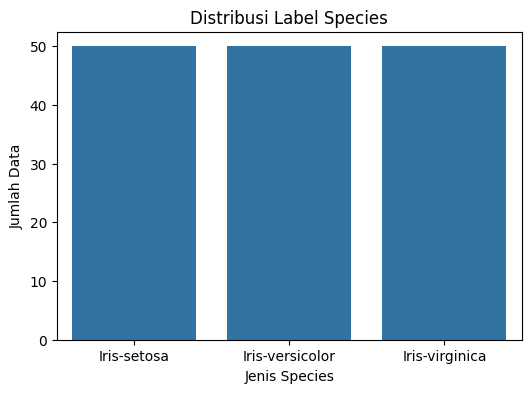

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=df)
plt.title('Distribusi Label Species')
plt.xlabel('Jenis Species')
plt.ylabel('Jumlah Data')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# Pilih fitur dan target
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[feature_cols]
y = df['species']

In [19]:
# Membagi dataset menjadi 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 120
Jumlah data testing: 30


In [20]:
# Membangun model Decision Tree
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [21]:
# Evaluasi Model Awal
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=[str(c) for c in le.classes_]
))



Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [22]:
# Mencari nilai max_depth terbaik
scores = {}

for d in range(2, 10):  # coba kedalaman 2 sampai 9
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores[d] = acc

# Tampilkan hasil tiap kedalaman
for depth, acc in scores.items():
    print(f"max_depth = {depth} → Akurasi = {round(acc * 100, 2)}%")

# Cari max_depth terbaik
best_d = max(scores, key=scores.get)
print("\nBest max_depth:", best_d, "| Accuracy:", round(scores[best_d] * 100, 2), "%")

max_depth = 2 → Akurasi = 93.33%
max_depth = 3 → Akurasi = 96.67%
max_depth = 4 → Akurasi = 93.33%
max_depth = 5 → Akurasi = 93.33%
max_depth = 6 → Akurasi = 93.33%
max_depth = 7 → Akurasi = 93.33%
max_depth = 8 → Akurasi = 93.33%
max_depth = 9 → Akurasi = 93.33%

Best max_depth: 3 | Accuracy: 96.67 %


In [23]:
# Membangun model terbaik berdasarkan hasil tuning
best_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=best_d,  # hasil tuning, misalnya best_d = 3
    random_state=42
)
best_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [24]:
# Evaluasi Model Terbaik
y_pred_best = best_model.predict(X_test)

print("Akurasi Model Terbaik:", round(accuracy_score(y_test, y_pred_best) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred_best, target_names=[str(c) for c in le.classes_]
))

Akurasi Model Terbaik: 96.67 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



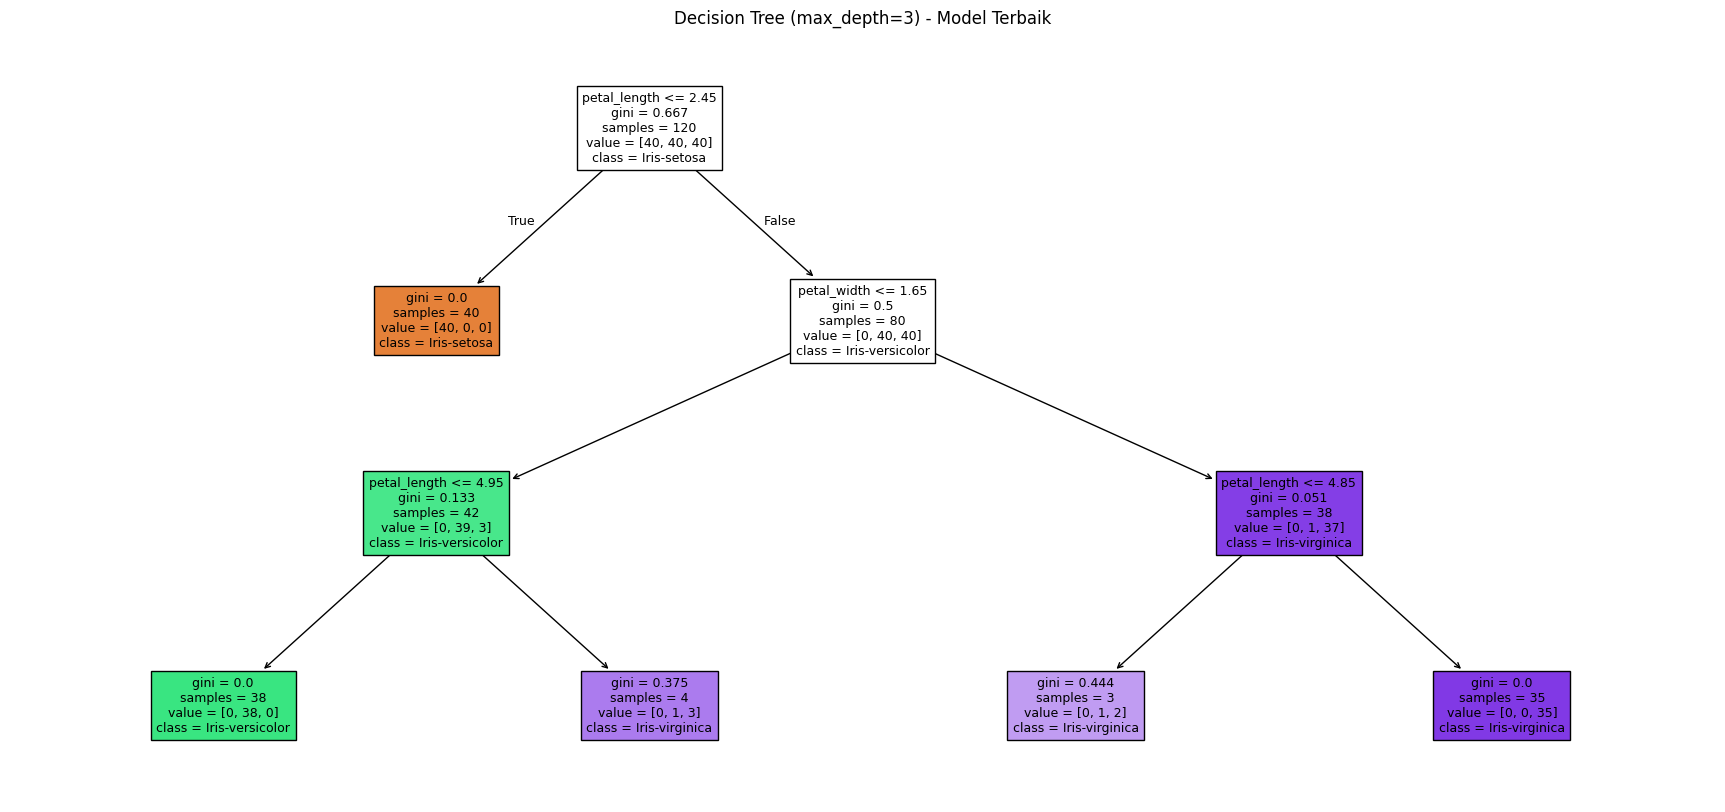

In [25]:
plt.figure(figsize=(22,10))
plot_tree(
    best_model,
    feature_names=feature_cols,
    class_names=[str(c) for c in le.classes_],
    filled=True,
    fontsize=9
)
plt.title(f"Decision Tree (max_depth={best_d}) - Model Terbaik")
plt.show()

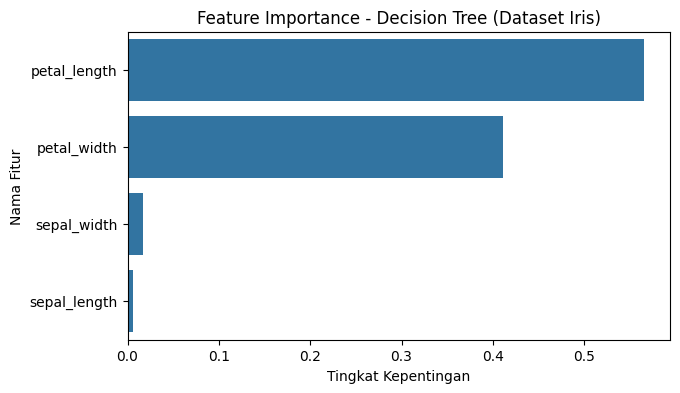

Nilai Feature Importance:
petal_length    0.565639
petal_width     0.411154
sepal_width     0.016878
sepal_length    0.006329
dtype: float64


In [26]:
# Fitur yang penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance - Decision Tree (Dataset Iris)")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Nama Fitur")
plt.show()

print("Nilai Feature Importance:")
print(imp)

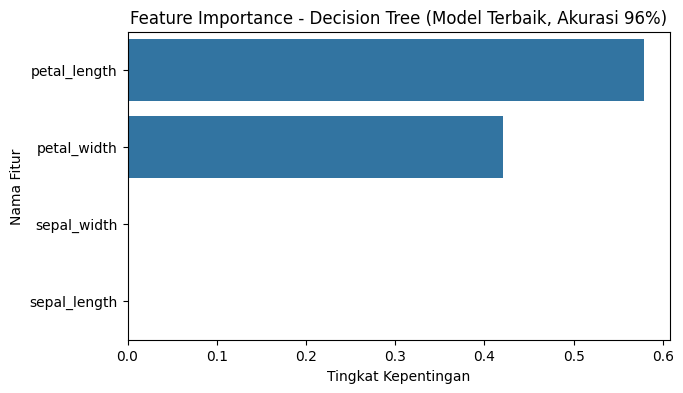

Nilai Feature Importance (Model Terbaik):
petal_length    0.579077
petal_width     0.420923
sepal_width     0.000000
sepal_length    0.000000
dtype: float64


In [29]:
# Feature importance dari model terbaik
imp_best = pd.Series(best_model.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=imp_best, y=imp_best.index)
plt.title("Feature Importance - Decision Tree (Model Terbaik, Akurasi 96%)")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Nama Fitur")
plt.show()

print("Nilai Feature Importance (Model Terbaik):")
print(imp_best)
